# Python ile Veri Görsellestirme Giris

In [1]:
# karmasık yapıları temsil eden daha basit yapıları görmemiz gerekmektedir.

* Matplotlib
    - yapılan islemi ifade etmek için daha fazla caba sarfedilir
    - bazı kutuphaneler matplotlib kütüphanesinin üzerine insa edilmistir
* Pandas 
    - pandas matplotlib üzerine insa edilmistir
    - high level dır. daha kolay kod yazma imkanı saglar
* Seaborn 
    - matplotlib üzerine insa edilmis
    - high level
    - istatiksel grafikleri ,çok bilgi tasıyan grafikleri ço daha kolay bi şekilde elde edilmesini saglar
* ggplot 
    - high level
    - katman mantıgıyla görsellestirme yapar
* Bokeh 
    - interaktif bir veri görsellestirme teknigidir
    - mathplotlib üzerine kurulmamıstır.
    - büyük veri setlerini ve akan veri setlerini yüksek performanslı olarak gerceklestirmeleri saglar.
* Plot.ly 
    - interaktif veri görsellestirme saglar
    - python ve r da kullanılabilmektedir.
  

# Veriye İlk Bakıs

## Veri Seti Hikayesi Ve Yapısının İncelenmesi

In [2]:
import seaborn as sns
df=sns.load_dataset("planets").copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
# 1.adım : # veri setinin hikayesi nedir?
# veri toplanma seklini bilmemiz gerekir
# bu veri seti nasıl olusturulmustur

In [ ]:
# 2. adım : Veri seti yapısal bilgileri nedir?

In [4]:
df.info()
# object kategorik degisken demektir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
# degiskenlerin tiplerine erismek istersek
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [7]:
# object tipini kategorik degiskene cevir.
# bazı fonksiyonlar objecti string olarak algılayabiliyor
# bu nedenle düzenlememiz gerekmektedir.

import pandas as pd
df.method=pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

## Veri Setinin Betimlenmesi

In [8]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [9]:
df.shape

(1035, 6)

In [10]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [11]:
df.describe().T# BETİMSEL İSTATSİTİKSEL - PANDAS KÜTÜPHANESİ
#eksik gözlemleri göz ardı eder ve kategorik degiskenleri dısarda bırakır


,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [12]:
df.describe(include="all").T# Kategorik degiskenleride koydugumuzda 
# cokta anlamlı bir bilgi gelmeyecektir.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


## Eksik Degerlerin İncelenmesi
    - eksik degerleri basit bazı çozumlere bakıcaz
    

In [13]:
# hic eksik gözlem var mı
df.isnull().values.any()

True

In [15]:
# hangi degiskende kacar tane var
df.isnull().sum()# degisken bazında eksik degerleri vermis olur

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [16]:
# hızlı cözüm olark 
# 1 . yaklasım olabilr: na degerlerine 0 basabiliriz
#df["degisken_ismi"].fillna(0,inplace=True)

In [18]:
df["orbital_period"].fillna(0,inplace=True)
df.isnull().sum()# orbital perioda ait degerler 0 olmus oldu

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [19]:
# eksik degerlerin doldurulmasında hasas olunması gerekir


In [27]:
df["mass"].fillna(df.mass.mean(),inplace=True)
df.isnull().sum()# mass deki eksik degerler de gitti
# yerine ortalamsı geldi

method              0
number              0
orbital_period     43
mass                0
distance          227
year                0
dtype: int64

In [26]:
df.isnull().sum()# verisetini tekrar çalıstırdık ve islemleri geri aldık

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

# Kategorik Degisken Özetleri

## Sadece Kategorik Degisken ve Özetleri

In [31]:
kat_df=df.select_dtypes(include=["object"])# object yerine category yazabiliriz
kat_df

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity
...,...
1030,Transit
1031,Transit
1032,Transit
1033,Transit


In [32]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


## Kategorik Degiskenin Sınıflarına ve Sınıf Sayısına Erişmek

In [34]:
kat_df.method.unique()# method degiskenin icindeki sınıf bilgilerine eristik

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [36]:
kat_df["method"].value_counts().count()# 10 adet sınıf var

10

## Kategorik Degiskenin Sınıflarının Frekansına Erismek


In [42]:
kat_df["method"].value_counts()# frekans bilgisine eristik

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

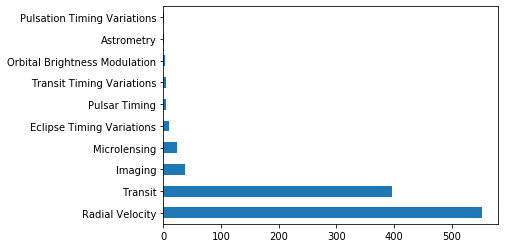

In [44]:
df["method"].value_counts().plot.barh();

## Sürekli Degisken Özetleri

In [47]:
df_num= df.select_dtypes(include=["float64","int64"])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [49]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [51]:
df_num["distance"].describe()# degisken özelinde özet istatistik calıstırabiliriz

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

## Dagılım Grafikleri

## Barplot - sütun grafikleri
* Elimizdeki kategorik degiskenleri görsellestirmek icin kullanılır

In [3]:
# diamonds veriseti kullanılacak
df=sns.load_dataset("diamonds").copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [55]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [58]:
kat_df =df.select_dtypes(include=["object"])
kat_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [60]:
kat_df.isnull().sum().any()

False

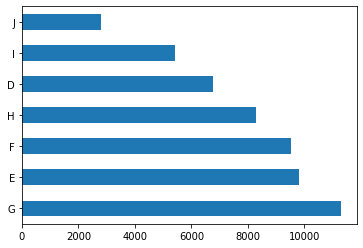

In [65]:
kat_df["cut"].value_counts().count()
kat_df["cut"].value_counts()# cut degiskenin sınıflarının frekansına eristik
kat_df["color"].value_counts().plot.barh()

In [66]:
# elimzdeki kategorik degiskenlerin ordinal oldugunu 
# gözlemliyoruz

In [68]:
# ordianal tanımlama
from pandas.api.types import CategoricalDtype
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [73]:
# cut degiskenini ordinal bir formatta tanımlama islemini gerceklestiricez
df_cut=df.cut.astype(CategoricalDtype(ordered=True))
df_cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [74]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [78]:
df_cut.head(1)# bu sıralama yanlıs olustu buu düzeltmemiz gerekir

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [80]:
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]
df_cut=df.cut.astype(CategoricalDtype(categories=cut_kategoriler,ordered=True))

In [81]:
df_cut.head(1)# dogru bir sekilde sıralamıs olduk

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

## Sütun Grafiginin( Bar Plot) Oluturulması

Text(0.5, 1.0, 'Cut Degiskeninin Sınıf Frekansları')

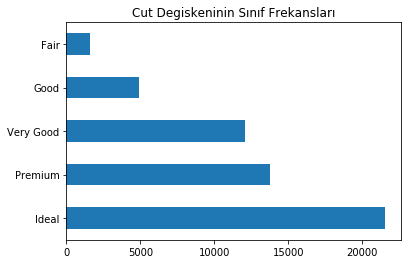

In [7]:
df["cut"].value_counts().plot.barh();
df["cut"].value_counts().plot.barh().set_title("Cut Degiskeninin Sınıf Frekansları")

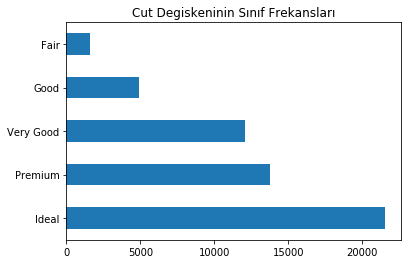

In [8]:
# pandas aracılıgıyla görsellestirme
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Degiskeninin Sınıf Frekansları"));

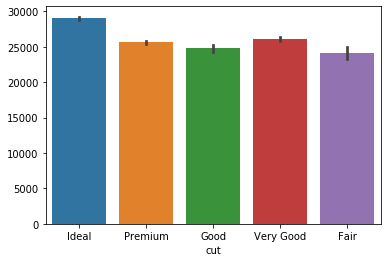

In [10]:
# seaborn ile görsellestirme ++++++++++
import seaborn as sns
sns.barplot(x="cut",y=df.cut.index,data=df);

## Sütun Grafik Çaprazlamalar<


In [1]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds=sns.load_dataset('diamonds')
df=diamonds.copy()
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategoriler,ordered=True))
df.head()
# cut kategorik degiskenini dönüstürme islemi gercceklesti

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


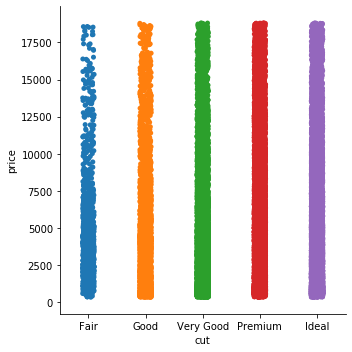

In [4]:
 # cut kategorik degiskeni ile price degiskeni caprazlanacak
sns.catplot(x="cut",y="price",data=df);
    

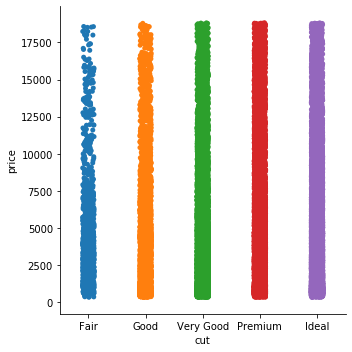

In [7]:
# bir boyut daha eklemek istersek
# hue ile bir katman daha ekledik
sns.catplot(x="cut",y="price",data=df);


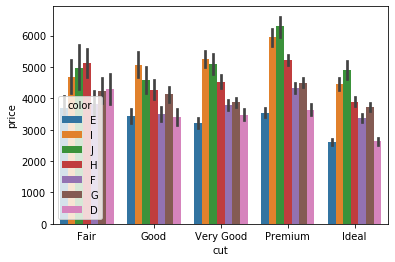

In [10]:
sns.barplot(x="cut",y="price",hue="color",data=df)

In [11]:
# veriyi görsellestirdikten sonra onu dogrulamamız gerekmektedir

df.groupby(["cut","color"])["price"].mean()
# dogrulamıs olduk 

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## Histogram ve Yoğunluk Grafiklerinin Olusturulması

In [13]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


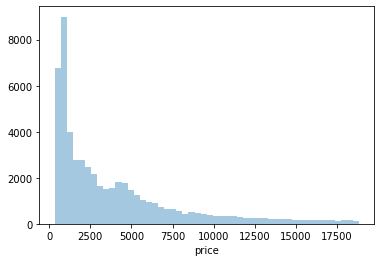

In [17]:
# distplat dagılım görsellestirmek icin kullanılan bir fonksiyon
sns.distplot(df.price,kde=False);

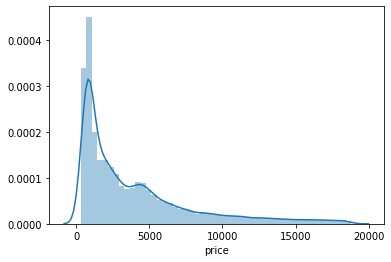

In [18]:
sns.distplot(df.price,kde=True);

In [21]:
# ?sns.distplot

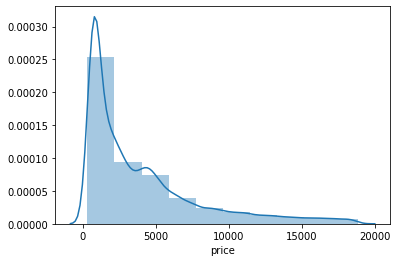

In [26]:
# bins=100 olursa 100 tane olusturulacak sekilde sütun olusturulur
sns.distplot(df.price,bins=10,kde=True);

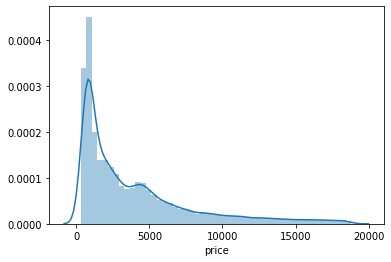

In [27]:
sns.distplot(df.price);

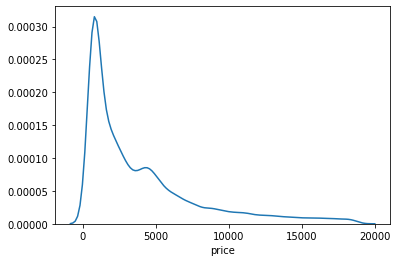

In [28]:
sns.distplot(df.price,hist=False);

* peki ne zman yogunlugu ne zmaan histogramı kullanmalıyız

    - ikiside sayısal bir degiskenin konumlanmasını dagılmasını ifade etmek ici kullanılır
    - dolsyısıyla her ikiside kullanılabilir


In [30]:
df["price"].describe().T

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

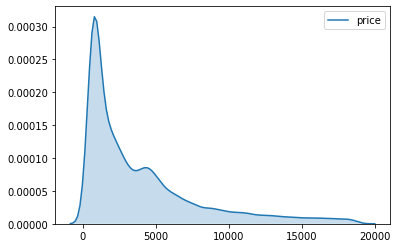

In [31]:
# altını doldurarak yapmak istsersek
sns.kdeplot(df.price,shade=True);

## Histogram ve Yoğunluk Çaprazlamalar 

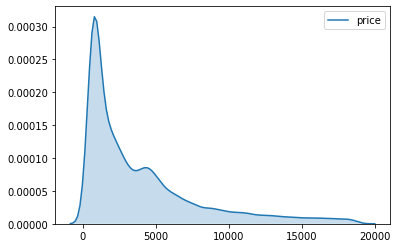

In [32]:
sns.kdeplot(df.price,shade=True);
# nasıl olmus


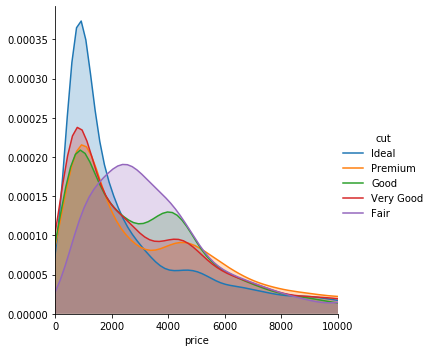

In [33]:
# yogunluk grafiginin üstüne boyut eklemek istiyoruz
# cut kategorik sınıfının degiskenlerini
(sns
 .FacetGrid(df,hue="cut",height=5,
               xlim=(0, 10000))
 .map(sns.kdeplot,"price",shade=True)
 .add_legend()
);

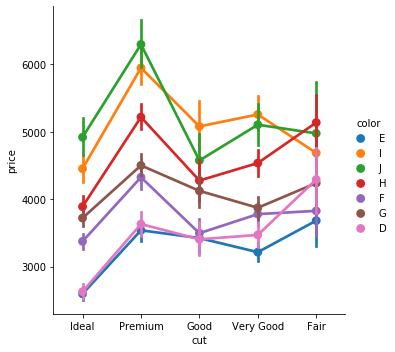

In [35]:
sns.catplot(x="cut",y="price",hue="color",kind="point",
           data=df);
# burada fiyatın farklı seviyelerinde 
# iki kategorik degiskenin farkını görebiliyoruz

### Veri Seti Hikayesi
 ## Boxplot 
 * sayısal degisken görsellestirme teknigi

In [36]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
# amacımız elimize bir veri geldi ve bu verisetini tanımya calısıyoruz
# iste veri görsellestirme teknikleri bize bu veriyi anlamamızı saglar

In [38]:
df.describe().T# SAYISAL DEGİSKENLERİN BETİMLENMESİ

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [40]:
# frekanslara bakıyoruz
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [42]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [43]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [44]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [45]:
# suana kadar sayısal degiskenlerimizi ve kategorik degiskenlerimizi tanımladık

# Boxplot Grafigini Olusturma
* boxplot bize kartiller aracılıgıyla cok degerli bilgiler sunar

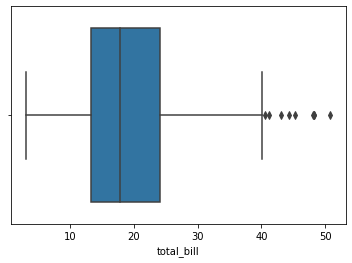

In [46]:
# amac yine veri setini incelemek 
sns.boxplot(x=df["total_bill"])


* boxplot bize bir degerin aykırı gözlem olarak degerlendirimesi için en fazla yol gösteren grafiklerdir.

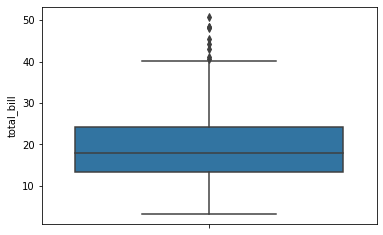

In [47]:
sns.boxplot(x=df["total_bill"],orient="v");

## Boxplot da Çaprazlamalar

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


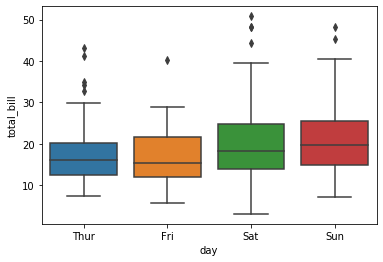

In [56]:
# hangi günler daha fazla kazanıyoruz

sns.boxplot(x="day",y="total_bill",data=df);

In [58]:
df.groupby("day")["total_bill"].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

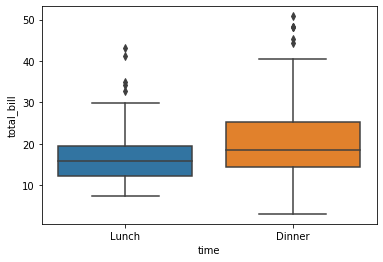

In [60]:
# sabah mı aksam mı daha cok kazanıyoruz
sns.boxplot(x="time",y="total_bill",data=df)

In [62]:
df.groupby("time")["total_bill"].mean()

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

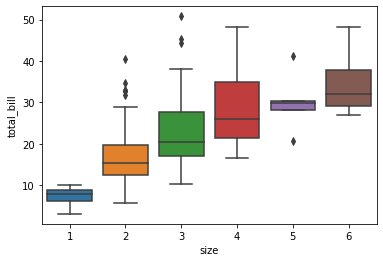

In [64]:
# yemege gelen grup sayısıyla kazancın dogru orantılı olup olmadıgını inceleyelim

sns.boxplot(x="size",y="total_bill",data=df);

In [65]:
df.groupby("size")["total_bill"].mean()
# buradan anlarız ki grup artıkca bahsis sayısıda artar

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

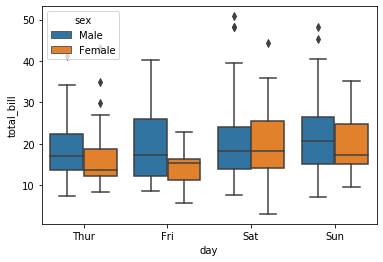

In [66]:
sns.boxplot(x="day",y="total_bill",hue="sex",data=df)

## Violin Grafiginin Olusturulması
* boxplota benzerdir.
* biraz daha dagılım anlamında bize bilgi sunar
* catplot fonksiyonuyla olusuturp kind argümanına violin deriz

In [67]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


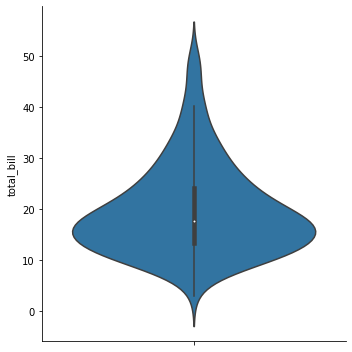

In [68]:
sns.catplot(y="total_bill",kind="violin",data=df);

### Violin Grafik Çaprazlamalar

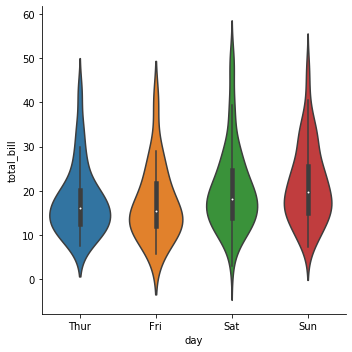

In [71]:
sns.catplot(x="day" ,y="total_bill",kind="violin",data=df)

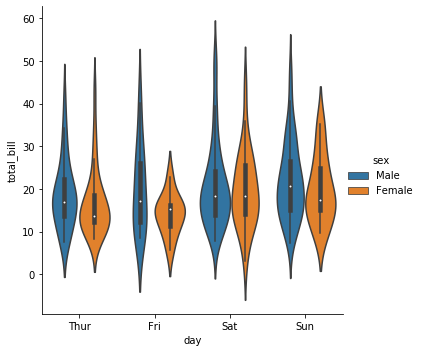

In [72]:
sns.catplot(x="day" ,y="total_bill",hue="sex",kind="violin",data=df)

## Korelasyon Grafikleri

* Korelasyon degiskenler arasındaki ilişkiyi ifade eden istatistiksel bir terimdir.

### Scatterplot

In [73]:
# iki sayısal degisken arasındaki ilişskiyi bize verir.
# Scatterplot sayısal degiskenler arasındaki iliskiyi bize verir

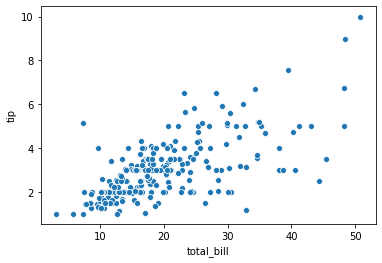

In [74]:
sns.scatterplot(x="total_bill",y="tip",data=df)
# sacılım grafigi 

## Korelasyon Çaprazlamalar


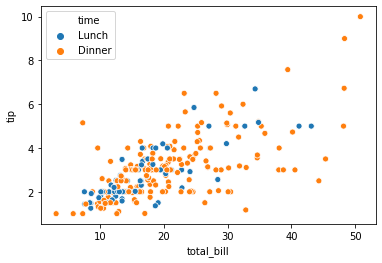

In [76]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df)

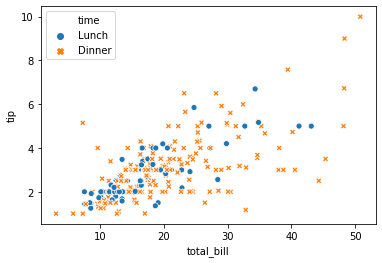

In [77]:
sns.scatterplot(x="total_bill",y="tip",hue="time",style="time",data=df)

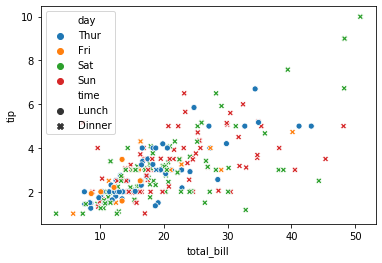

In [78]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="time",data=df)

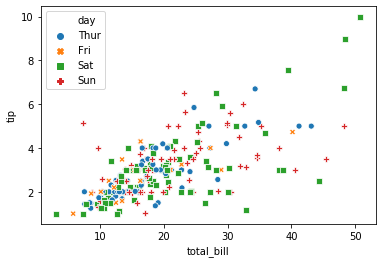

In [81]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="day",data=df)

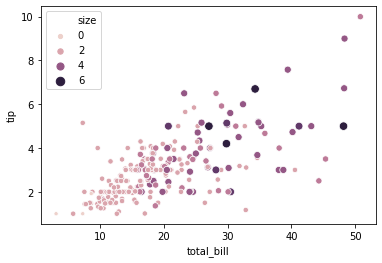

In [83]:
sns.scatterplot(x="total_bill",y="tip",hue="size",size="size",data=df)

## Dogrusal İliskinin Gösterilmesi

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


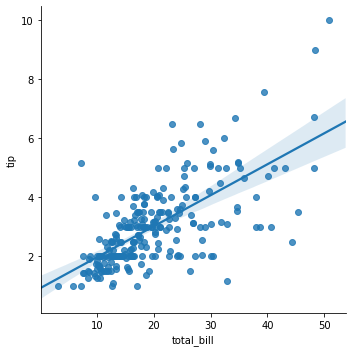

In [3]:
# sacılım grafigini kullanarak bu iliskiyi dogrusal olarakta gösterebiliriz

sns.lmplot(x="total_bill",y="tip",data=df);
# dogrunun etrafındaki acık renkli yerler sapmaları ifade ediyor

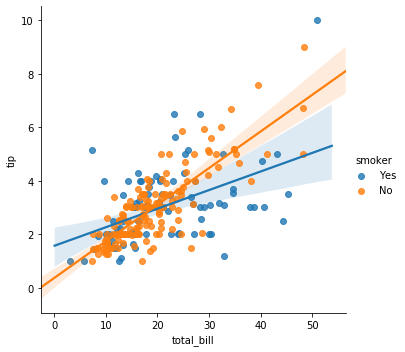

In [4]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=df);


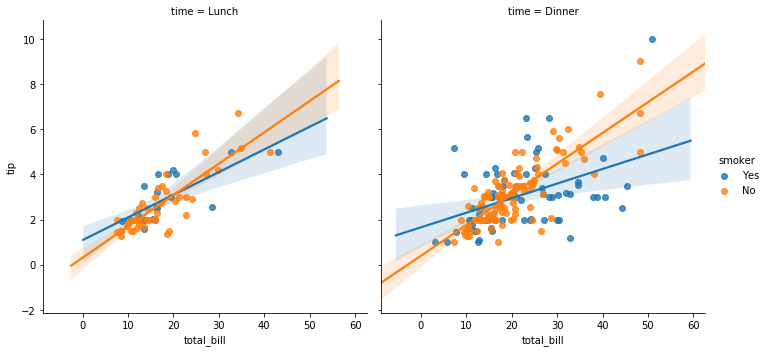

In [5]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",data=df);


In [6]:
# egimlerde fark var ama bu dikkate alacak kadar önemli midir

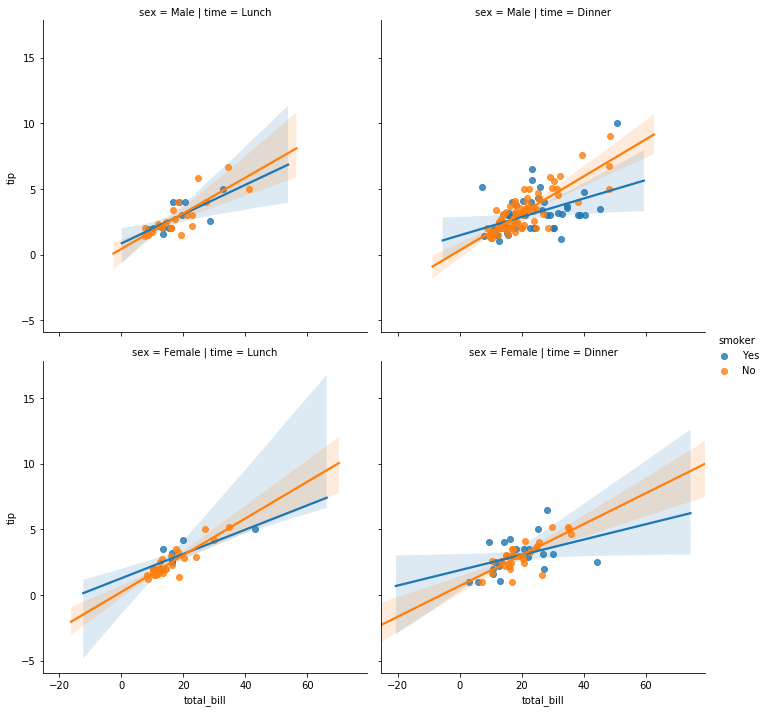

In [7]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=df);


## Scatterplot Matrisi

In [8]:
import seaborn as sns
iris=sns.load_dataset("iris")
df=iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# sayısal degiskenler arasındaki ilişkiyi ifade edecegiz

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
df.shape# 150 gözlem 5 degskenden olusur

(150, 5)

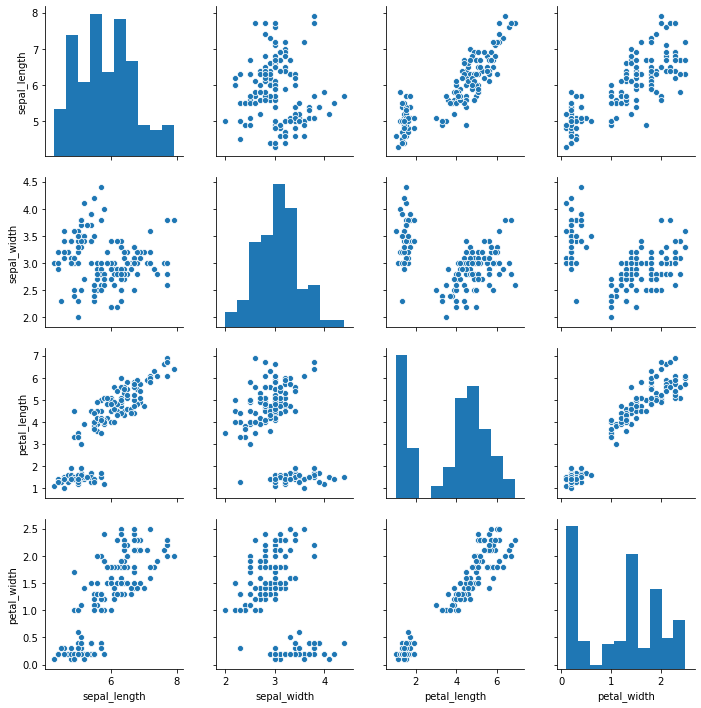

In [13]:
sns.pairplot(df)

In [ ]:
# sactterplot olarak cıkan bir cıktıyı inceledigimizde eğer o görüntü 
# toz bulutu seklindeyse o iki gdegisken arasında bir iliski olmadıgını
# gösterir

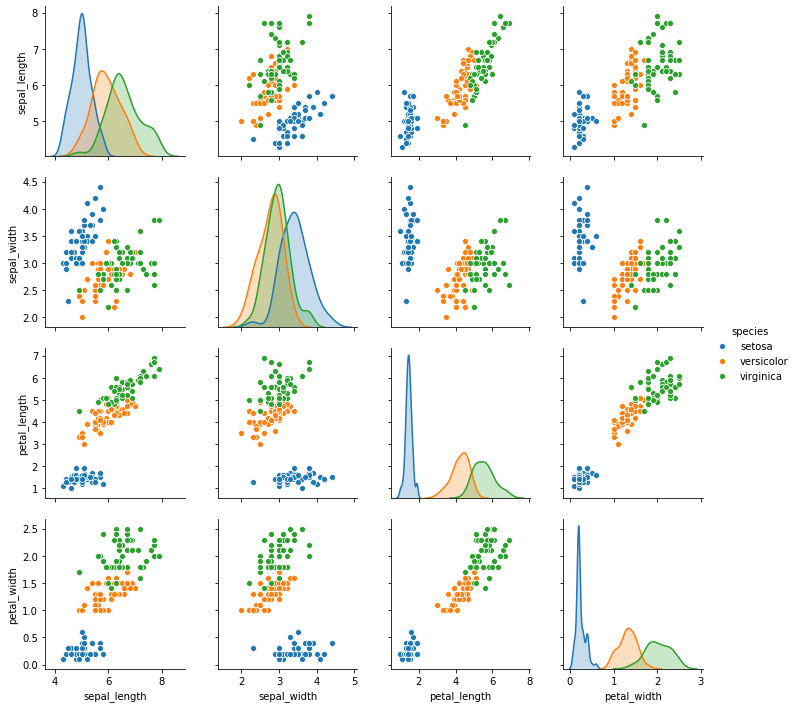

In [14]:
# eger cesitli noktalarda kümelenmeler varsa bu orada farklı yapıların 
# oldugunu gösterir.bunları görselde kırılm olarak eklemek gerekmektedir
sns.pairplot(df,hue="species")

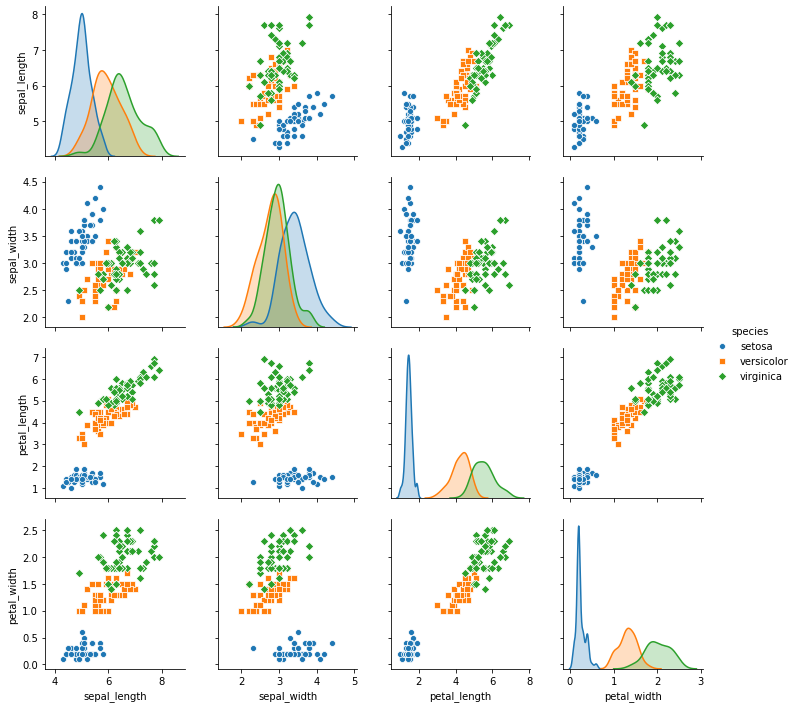

In [16]:
sns.pairplot(df,hue="species",markers=["o","s","D"])

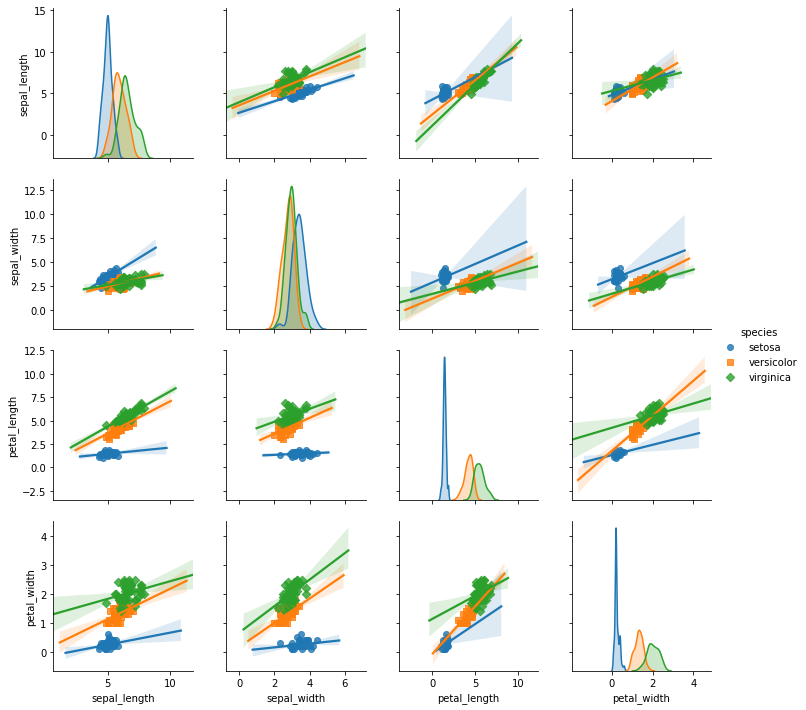

In [17]:
sns.pairplot(df,hue="species",markers=["o","s","D"],kind="reg")

## Heatmap
* sadece zamansal baglamda değil elmizde cok sınıflı bir kategorik degisken varsa bunu belirli bir sayısal degisken acısından görsellestirme ihtiyacımız varsa bu durumdada çok işe yarar.

In [57]:
import seaborn as sns
flights=sns.load_dataset("flights")
df=flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [3]:
df.shape

(144, 3)

In [4]:
df["passengers"].describe().T

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [6]:
# PİVOT TABLE ARACILIGIYLA DÜZENLEME YAPARIZ
#sns.heatmap(df)# calısmaz !!

In [59]:
#df.pivot(index='month',columns='year')['passengers']
df_heat=df.pivot("month","year","passengers")


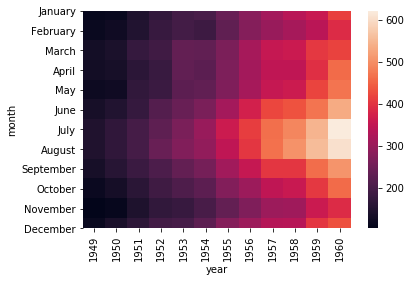

In [60]:
sns.heatmap(df_heat)

In [61]:
# yapı saptmak problemleri oldugunda cok iyi sonuc verir


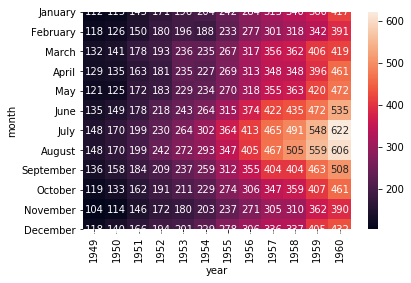

In [63]:
sns.heatmap(df_heat,annot=True,fmt="d");

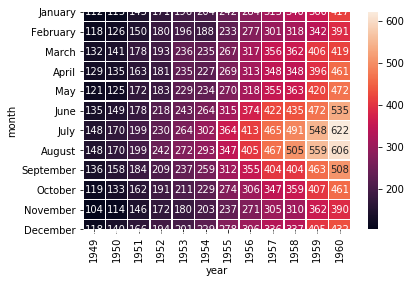

In [64]:
sns.heatmap(df_heat,annot=True,fmt="d",linewidth=0.5);

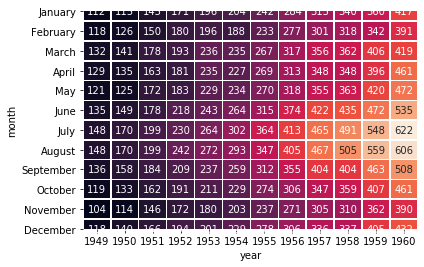

In [65]:
# yandaki barı cbar argümanını false yaparak kaldırdık
sns.heatmap(df_heat,annot=True,fmt="d",linewidth=0.5,cbar=False);

## Çizgi Grafik

### Veri Seti Hikayesi

In [66]:
import seaborn as sns
fmri=sns.load_dataset("fmri")
df=fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [67]:
df.shape

(1064, 5)

In [69]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


In [71]:
df["timepoint"].describe().T

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [72]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [73]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [74]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Çizgi Grafigin( Line plot ) Olusturulması
### Çizgi Grafik ve Çaprazlamalar

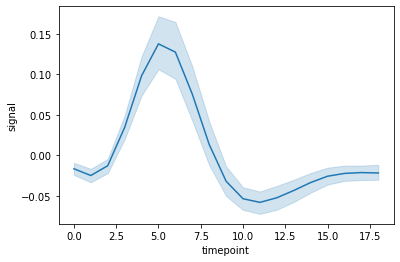

In [75]:
sns.lineplot(x="timepoint",y="signal",data=df)

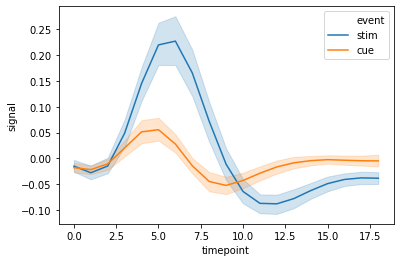

In [76]:
sns.lineplot(x="timepoint",y="signal",hue="event",data=df)

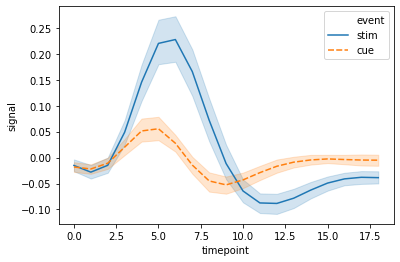

In [77]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="event",
             style="event",data=df)

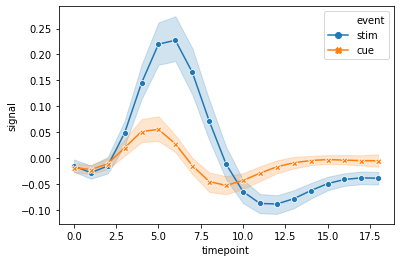

In [78]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="event",
             style="event",
             markers=True,
             dashes=False,
             data=df)

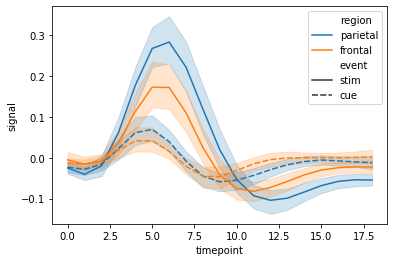

In [80]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="region",
             style="event",
             data=df)

## Basit Zaman Serisi Grafiği

In [81]:
!pip install pandas_datareader
import pandas_datareader as pr

In [82]:
# appleın borsadaki hisse senedi degerleri


In [83]:
df=pr.get_data_yahoo("AAPL",start="2016-01-01",end="2019-08-25")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.213585
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.752419
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.878586
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.916473
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.391907


In [84]:
df.shape

(917, 6)

In [86]:
kapanis=df["Close"]
kapanis

Date
2016-01-04    105.349998
2016-01-05    102.709999
2016-01-06    100.699997
2016-01-07     96.449997
2016-01-08     96.959999
                 ...    
2019-08-19    210.350006
2019-08-20    210.360001
2019-08-21    212.639999
2019-08-22    212.460007
2019-08-23    202.639999
Name: Close, Length: 917, dtype: float64

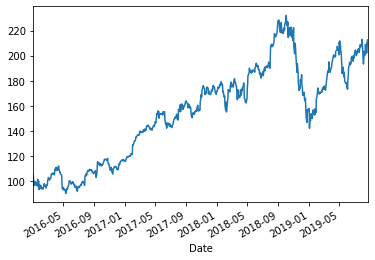

In [87]:
kapanis.plot()

In [88]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [93]:
kapanis.index=pd.DatetimeIndex(kapanis.index)
kapanis

Date
2016-01-04    105.349998
2016-01-05    102.709999
2016-01-06    100.699997
2016-01-07     96.449997
2016-01-08     96.959999
                 ...    
2019-08-19    210.350006
2019-08-20    210.360001
2019-08-21    212.639999
2019-08-22    212.460007
2019-08-23    202.639999
Name: Close, Length: 917, dtype: float64